In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from aging.behavior.syllables import relabel_by_usage
import colorcet as cc
from pathlib import Path
import math

In [2]:
def age_map_fun(age):
    try:
        return int(age.split("w")[0])
    except ValueError:
        return {"3": 12, "6": 24, "9": 35, "12": 52, "18": 78, "22": 90}[
            age.split("m")[0]
        ]

## upload data and housekeeping

In [3]:
df = pd.read_parquet('/n/groups/datta/win/longtogeny/data/ontogeny/version_08/ontogeny_males_syllable_df_v00.parquet')

In [4]:
# relabel syllables by usage and add age
df = relabel_by_usage(df, return_map=False)
#df['age'] = df['age'].map(age_map)
# map CRL mice as 91 age to make them different
df = df[~df['session_name'].str.contains('CRL')]

In [5]:
unique_ages = df['age'].unique()
age_map = dict(zip(unique_ages, map(age_map_fun, unique_ages)))
df['age'] = df['age'].map(age_map).astype('int16[pyarrow]')

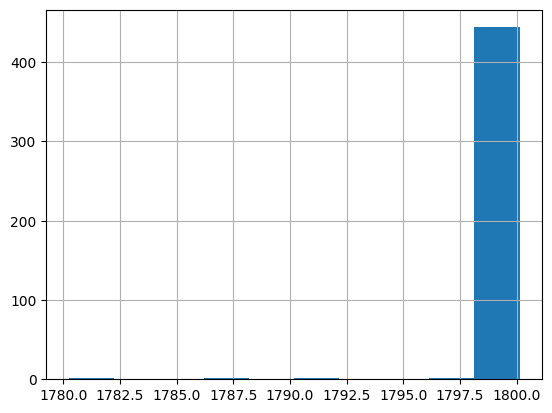

In [6]:
# clean up the data by removing short sessions
t = 600
session_length = df.groupby("uuid", sort=False)['timestamps'].max()
remove_uuids = session_length[session_length < t].index
session_length.hist()
df = df[~df['uuid'].isin(remove_uuids)]

In [7]:
# remove duplicated files due to cleaning extractions
new_df = []
for (date, subject), _df in df.groupby(['date', 'subject_name'], sort=False):
    if _df['uuid'].nunique() > 1:
        _df = _df[_df['file'].str.contains('proc_cleaned')]
    new_df.append(_df)
    
df = pd.concat(new_df)

In [8]:
# compute usge

In [9]:
usage_df = df.query('onsets').groupby(['age', 'subject_name', 'session_name','uuid','date'])['relabeled_syllables'].value_counts(normalize=True)
usage_df.name = 'usage'
usage_df = usage_df.reset_index()
usage_mtx = usage_df.pivot_table(values='usage', columns='relabeled_syllables', index=['age','subject_name','session_name', 'uuid','date']).fillna(0)

In [10]:
v = df.groupby(['age','subject_name','session_name', 'uuid','date']).velocity_2d_mm.mean()
usage_mtx['velocity'] = v
usage_mtx.set_index('velocity', append=True, inplace=True)
usage_mtx = usage_mtx.drop(35, level='age')

In [11]:
from collections import Counter
Counter(usage_mtx.index.get_level_values(0))

Counter({12: 27,
         78: 27,
         52: 26,
         24: 24,
         5: 16,
         7: 16,
         9: 16,
         16: 16,
         20: 16,
         28: 16,
         32: 16,
         36: 16,
         40: 16,
         44: 16,
         48: 16,
         56: 16,
         60: 16,
         68: 16,
         72: 16,
         80: 16,
         84: 16,
         90: 16,
         3: 15,
         64: 15,
         103: 11})

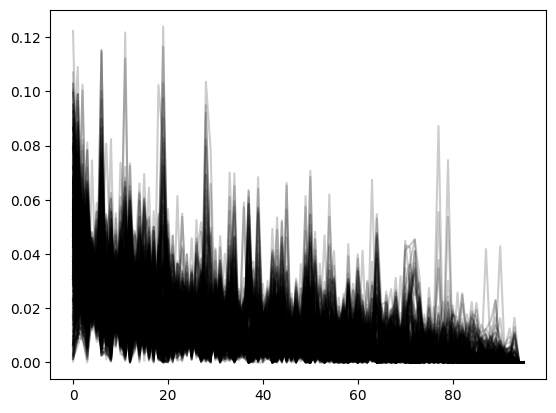

In [12]:
plt.plot(usage_mtx.values.T, c='k', alpha=0.2);

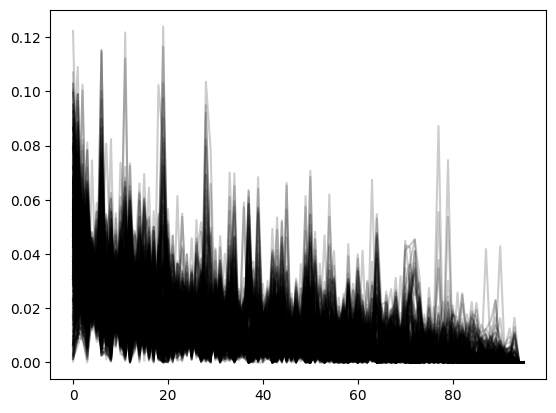

In [13]:
# remove sessions with abnormally high syllable usage
us = 0.2
usage_mtx = usage_mtx[~(usage_mtx > us).any(axis=1)]
plt.plot(usage_mtx.values.T, c='k', alpha=0.2);

In [14]:
sorted(usage_mtx.index.get_level_values(1).unique())

['103M_01',
 '103M_02',
 '103M_03',
 '16M_01',
 '16M_02',
 '16M_03',
 '16M_04',
 '20M_01',
 '20M_02',
 '20M_03',
 '20M_04',
 '28M_01',
 '28M_02',
 '28M_03',
 '28M_04',
 '32M_01',
 '32M_02',
 '32M_03',
 '32M_04',
 '36M_01',
 '36M_02',
 '36M_03',
 '36M_04',
 '40M_01',
 '40M_02',
 '40M_03',
 '40M_04',
 '44M_01',
 '44M_02',
 '44M_03',
 '44M_04',
 '48M_01',
 '48M_02',
 '48M_03',
 '48M_04',
 '56M_01',
 '56M_02',
 '56M_03',
 '56M_04',
 '60M_01',
 '60M_02',
 '60M_03',
 '60M_04',
 '64M_01_01',
 '64M_01_02',
 '64M_01_03',
 '64M_01_04',
 '64M_02_01',
 '64M_02_02',
 '64M_02_03',
 '64M_03_01',
 '64M_03_02',
 '64M_03_03',
 '64M_03_04',
 '64M_04_01',
 '64M_04_02',
 '64M_04_03',
 '64M_04_04',
 '68M_01',
 '68M_02',
 '68M_03',
 '68M_04',
 '72M_01',
 '72M_02',
 '72M_03',
 '72M_04',
 '80M_01',
 '80M_02',
 '80M_03',
 '80M_04',
 '84M_01',
 '84M_02',
 '84M_03',
 '84M_04',
 'c01_m01_b01',
 'c01_m02_b02',
 'c01_m03_b03',
 'c01_m04_b04',
 'c02_m01_b01',
 'c02_m02_b02',
 'c02_m03_b03',
 'c02_m04_b04',
 'c03_m01_

In [15]:
from collections import Counter
Counter(usage_mtx.index.get_level_values(0))

Counter({12: 27,
         78: 27,
         52: 26,
         24: 24,
         5: 16,
         7: 16,
         9: 16,
         16: 16,
         20: 16,
         28: 16,
         32: 16,
         36: 16,
         40: 16,
         44: 16,
         48: 16,
         56: 16,
         60: 16,
         68: 16,
         72: 16,
         80: 16,
         84: 16,
         90: 16,
         3: 15,
         64: 15,
         103: 11})

In [16]:
data_folder = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_08')
usage_mtx.to_parquet(data_folder / "ontogeny_males_clean_v1.parquet", engine='pyarrow') 

In [17]:
#get random 16 mice for ages in which there are more than 16 mice
n=16
usage_mtx = usage_mtx.groupby('age').apply(lambda x: x.sample(n=n,replace=False) if len(x)>n else x.sample(n=len(x),replace=False)).reset_index(level=0, drop=True)

In [18]:
Counter(usage_mtx.index.get_level_values(0))

Counter({5: 16,
         7: 16,
         9: 16,
         12: 16,
         16: 16,
         20: 16,
         24: 16,
         28: 16,
         32: 16,
         36: 16,
         40: 16,
         44: 16,
         48: 16,
         52: 16,
         56: 16,
         60: 16,
         68: 16,
         72: 16,
         78: 16,
         80: 16,
         84: 16,
         90: 16,
         3: 15,
         64: 15,
         103: 11})

In [19]:
data_folder = Path('/n/groups/datta/win/longtogeny/data/ontogeny/version_08')
usage_mtx.to_parquet(data_folder / "ontogeny_males_clean_v2.parquet", engine='pyarrow') 

In [20]:
usage_mtx

relabeled_syllables                                                                                             0   \
age subject_name session_name          uuid                                 date                velocity             
3   m12b04c03    ontogeny_cohorts_3wks 8a69a400-d4c6-4e3a-a1ce-90fd44e2b211 2021-10-29 11:45:21 1.430512  0.001338   
    m02b02c01    ontogeny_cohorts_3wks 50f301fb-540b-4f91-8c6e-25603cd577f8 2021-10-29 10:18:39 1.582991  0.004357   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409 2023-06-05 13:09:47 1.774961  0.000316   
    m05b01c02    ontogeny_cohorts_3wks f4fb0019-e9ec-42b1-8754-12617f99db01 2021-10-29 11:00:21 1.702545  0.002822   
    m08b04c02    ontogeny_cohorts_3wks f9fbcb51-7264-4277-921e-f42e696e2f0b 2021-10-29 11:00:50 1.605785  0.002080   
...                                                                                                            ...   
103 103M_01      otgy_103M_01          e53d5526-2371-42c1-ab8b-4550d658df60 2023-10-07 08:46:33 1.208204  0.062702   
    103M_03      otgy_103M_03          dff86510-b65f-4713-aa22-0a4e95f53c23 2023-10-07 15:50:02 1.660285  0.063916   
    103M_01      otgy_103M_01          b9e9f69e-9b6d-4220-b2a7-f39f9f918278 2023-10-07 08:46:53 0.992632  0.071921   
    103M_03      otgy_103M_03          12c87762-a3c7-455d-bfd0-2bef930d841a 2023-10-07 12:50:20 1.280628  0.080639   
                                       a7fd53a9-cf84-466d-a54a-0f4540660cad 2023-10-07 12:50:53 1.917682  0.059651   

relabeled_syllables                                                                                             1   \
age subject_name session_name          uuid                                 date                velocity             
3   m12b04c03    ontogeny_cohorts_3wks 8a69a400-d4c6-4e3a-a1ce-90fd44e2b211 2021-10-29 11:45:21 1.430512  0.009365   
    m02b02c01    ontogeny_cohorts_3wks 50f301fb-540b-4f91-8c6e-25603cd577f8 2021-10-29 10:18:39 1.582991  0.014410   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409 2023-06-05 13:09:47 1.774961  0.011051   
    m05b01c02    ontogeny_cohorts_3wks f4fb0019-e9ec-42b1-8754-12617f99db01 2021-10-29 11:00:21 1.702545  0.013484   
    m08b04c02    ontogeny_cohorts_3wks f9fbcb51-7264-4277-921e-f42e696e2f0b 2021-10-29 11:00:50 1.605785  0.010055   
...                                                                                                            ...   
103 103M_01      otgy_103M_01          e53d5526-2371-42c1-ab8b-4550d658df60 2023-10-07 08:46:33 1.208204  0.099110   
    103M_03      otgy_103M_03          dff86510-b65f-4713-aa22-0a4e95f53c23 2023-10-07 15:50:02 1.660285  0.043420   
    103M_01      otgy_103M_01          b9e9f69e-9b6d-4220-b2a7-f39f9f918278 2023-10-07 08:46:53 0.992632  0.056848   
    103M_03      otgy_103M_03          12c87762-a3c7-455d-bfd0-2bef930d841a 2023-10-07 12:50:20 1.280628  0.061315   
                                       a7fd53a9-cf84-466d-a54a-0f4540660cad 2023-10-07 12:50:53 1.917682  0.029544   

relabeled_syllables                                                                                             2   \
age subject_name session_name          uuid                                 date                velocity             
3   m12b04c03    ontogeny_cohorts_3wks 8a69a400-d4c6-4e3a-a1ce-90fd44e2b211 2021-10-29 11:45:21 1.430512  0.012375   
    m02b02c01    ontogeny_cohorts_3wks 50f301fb-540b-4f91-8c6e-25603cd577f8 2021-10-29 10:18:39 1.582991  0.014410   
    c07_m03_b03  ontogeny_males_3w     183c7534-404c-4071-9b7f-7285d7459409 2023-06-05 13:09:47 1.774961  0.018314   
    m05b01c02    ontogeny_cohorts_3wks f4fb0019-e9ec-42b1-8754-12617f99db01 2021-10-29 11:00:21 1.702545  0.012230   
    m08b04c02    ontogeny_cohorts_3wks f9fbcb51-7264-4277-921e-f42e696e2f0b 2021-10-29 11:00:50 1.605785  0.011442   
...                                                                                                     